In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (July 2018) 
#
# Calculate error between reconstructed vs observed gene expression
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns

randomState = 123
from numpy.random import seed
seed(randomState)

In [3]:
# load arguments
estimated_file = os.path.join(os.path.dirname(os.getcwd()), "output", "cipro_treatment", "estimated_test_control_2layer_10latent.txt")
obsv_file = os.path.join(os.path.dirname(os.getcwd()), "data", "cipro_treatment", "test_treat.txt")

# output
fig_file = os.path.join(os.path.dirname(os.getcwd()), "viz", "cipro_treatment", "Tybalt_2layer_10latent_transform.png")

In [4]:
# read in data
estimated_data = pd.read_table(estimated_file, header = 0, sep = '\t', index_col = 0)
obsv_data = pd.read_table(obsv_file, header = 0, sep = '\t', index_col = 0)

estimated_data.columns = obsv_data.columns  #Add gene ids to merge on later

#obsv_data
estimated_data

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM356955.CEL,0.358542,0.324456,0.350830,0.481336,0.347849,0.489554,0.472218,0.396659,0.385732,0.296099,...,0.468868,0.395207,0.307133,0.615222,0.486624,0.518483,0.546446,0.502640,0.357112,0.329554
GSM954576_Nomura_PA01-1_Pae_G1a_.CEL,0.420885,0.483535,0.325879,0.493468,0.220801,0.391990,0.618103,0.348969,0.277072,0.216658,...,0.380398,0.359727,0.336657,0.492243,0.547591,0.327762,0.420156,0.272394,0.318638,0.384749
GSM954578_Nomura_PA01-3_Pae_G1a_.CEL,0.542868,0.576337,0.368145,0.507825,0.262005,0.368468,0.642378,0.367015,0.295715,0.161305,...,0.420684,0.369184,0.462039,0.478669,0.597905,0.195168,0.287577,0.223031,0.404061,0.588534
GSM954579_Nomura_PA01-4_Pae_G1a_.CEL,0.516973,0.559630,0.356060,0.500068,0.253469,0.370276,0.630808,0.365668,0.288986,0.168772,...,0.403792,0.370252,0.440641,0.475569,0.586929,0.219099,0.310545,0.230055,0.390818,0.550326
GSM92182.CEL,0.624377,0.696055,0.443347,0.662598,0.383040,0.408290,0.501135,0.474856,0.489191,0.185874,...,0.407585,0.445548,0.544919,0.524490,0.568070,0.189258,0.340374,0.383591,0.604146,0.656161


In [5]:
# Average gene expression across samples
estimated_data_mean = estimated_data.mean(axis=0)
obsv_data_mean = obsv_data.mean(axis=0)

estimated_data_mean_df = pd.DataFrame(estimated_data_mean, index = estimated_data_mean.index, columns=['estimated'])
obsv_data_mean_df = pd.DataFrame(obsv_data_mean, index = obsv_data_mean.index, columns = ['observed'])

estimated_data_mean_df.head(5)
#obsv_data_mean_df.head(5)

,estimated
PA0001,0.492729
PA0002,0.528003
PA0003,0.368852
PA0004,0.529059
PA0005,0.293433


In [6]:
# Join 
X = pd.merge(estimated_data_mean_df, obsv_data_mean_df, left_index=True, right_index=True)
X.head(5)

,estimated,observed
PA0001,0.492729,0.577523
PA0002,0.528003,0.600055
PA0003,0.368852,0.426914
PA0004,0.529059,0.638128
PA0005,0.293433,0.217117


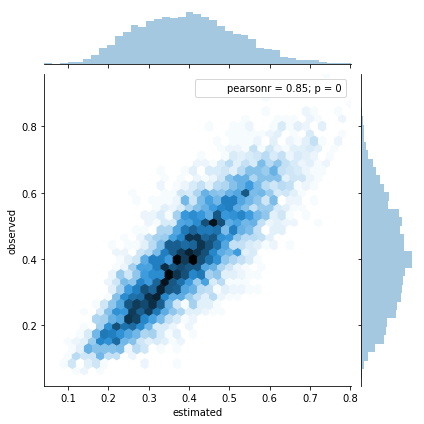

In [7]:
# Plot
fg=sns.jointplot(x='estimated', y='observed', data=X, kind='hex');
fg.savefig(fig_file)

In [8]:
# Calculate error: RMSE of estimated data and observed data per sample

# Note: estiamted and observed samples are not matched, so how do we compare them?
#rmse = np.ndarray(shape=(1, estimated_data.shape[1]))
#i = 0
#for col in estimated_data.columns:
#    rmse[0,i] = ((estimated_data[col] - obsv_data[col]) ** 2).mean() ** .5
#    i+=1
#rmse